# Tratamento e limpeza de dados 

# Imports

In [691]:
import pandas as pd
import numpy as np
import seaborn as sns

# Sobre os dados



### Contexto

A coleta de dados de aplicativos da Apple App Store é relativamente fácil devido à estrutura bem organizada de suas páginas, o que facilita a raspagem de dados. No entanto, a obtenção de dados do Google Play Store é mais desafiadora porque a loja utiliza técnicas modernas, como carregamento dinâmico de páginas com JQuery, que complicam o processo de raspagem.

Esse contexto explica as dificuldades em obter dados do Google Play Store, justificando a raridade desses datasets em comparação aos dados da Apple App Store.

Cada linha do dataframe representa um app único

Colunas do dataframe:

* App (nome dos aplicativos)	
* Category (tipo de aplicativo que pode ser de artes, jogos, encontros, quadrinhos, etc...)
* Rating (nota no google play store)
* Reviews	(comentários a respeito do aplicativo)
* Size	(tamanho do aplicativo)
* Installs	(número de vezes que foi baixado)
* Type	(se ele é pago ou gratuito)
* Price	(preço do app em dolares)
* Content Rating (classificação do conteúdo)
* Genres (Equivalente a categoria)
* Last Updated	(Última vez que o app foi atualizado)
* Current Ver	(versão mais recente do aplicativo)
* Android Ver   (Compatibilidade com a versão do android)

### Objetivo 

Neste notebook, meu principal objetivo é realizar uma análise criteriosa do conjunto de dados, identificando e corrigindo possíveis inconsistências e anomalias. Este processo de limpeza e preparação dos dados é essencial para garantir que a posterior análise exploratória seja precisa e confiável, permitindo insights robustos e relevantes a partir dos dados tratados

### Fonte dos dados
O dataset foi obtido do seguinte repositório do Kaggle:
https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download&select=googleplaystore_user_reviews.csv


# Data Loading

In [692]:
path_ = '../dataset/googleplaystore.csv'

In [693]:
df = pd.read_csv(path_)

## Data exploration

In [694]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [695]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [696]:
df.shape

(10841, 13)

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Identificando inconsistências

## Valores duplicados

In [698]:
df.duplicated().sum()

483

## Valores únicos

In [699]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
------------------------------
Coluna: Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
------------------------------
Coluna: Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2

### A partir da análise destes valores únicos posso detectar as inconsistências a seguir

### Valores nulos

In [700]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Valores incoerentes

In [701]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

No final da lista há um valor chamado "Everyone", que está completamente fora do que se é esperado nessa coluna

In [702]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

No final da lista há o valor 1.9 que também está completamente fora do que se é esperado

In [703]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

A coluna `Type` deveria possuir apenas dois tipos de valores

In [704]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Há alguns valores estranhos também na coluna `Installs`

In [705]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

### Coluna `Reviews` 
deveria conter comentários dos usuários, mas ela carrega epenas números que a princípio não possuem significado

### Coluna `Genres`
Essa coluna carrega o mesmo tipo de informação que a coluna `Category`. Vale a pena uma olhada mais aprofundada para verificar se preservar as duas colunas é relevante

## Erros de tipagem

In [706]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


A coluna `price` está no formato textual, mas é interessante que ela seja convertida para numérica

## Falta de padronização

In [707]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

O tamanho dos arquivos podem estar na unidade megabyte ou kbyte. O mais indicado é converter esses valores para uma unica medida 

## Outliers 

Uma análise sobre os outliers será feita posteriormente a alteração da tipagem da coluna `Price`

# Corrigindo as inconsistências

## Valores duplicados

Cada linha do dataframe corresponde a um único aplicativo, o que significa que linhas duplicadas são um erro e não um possível padrão de sazonalidade. Portanto elas podem ser removidas do dataframe original

In [708]:
df = df.drop_duplicates()

## Valores nulos

In [709]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Há muitos valores faltantes na coluna de `Rating` e mais alguns poucos valores nas colunas `Type`,`Content Rating`, `Current Ver` e `Android Ver`, entretando não há como preenche-los. Por essa razão decidi por criar uma cópia do dataframe sem essas linhas faltantes

In [710]:
colunas_com_linhas_dropar = ['Rating','Type','Content Rating','Current Ver','Android Ver']

In [711]:
df[colunas_com_linhas_dropar].isna().any(axis=1).sum()

1472

In [712]:
df_sem_nulos = df.dropna(subset=colunas_com_linhas_dropar).reset_index(drop=True).copy()

In [713]:
df_sem_nulos.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Valores incoerentes

Quando excluimos as linhas com valores nulos também excluimos as linhas que carregavam o valor `Everyone` da coluna `Price` e `1.9` da coluna `Category`

In [714]:
print(df_sem_nulos[df_sem_nulos['Price']=='Everyone'])
print("-"*30)
print(df_sem_nulos[df_sem_nulos['Category']=='1.9'])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []
------------------------------
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


Uma observação que deve ser feita é que havia um valor estranho também na coluna `Size` igual a `1,000`, no entanto esse valor estava presente na mesma linha que carregava o valor `Everyone` na coluna `Price`. A antiga linha era a de número 10472

As colunas `Type` e `Installs` também não possuem mais valores inesperados

In [715]:
print(df_sem_nulos['Type'].unique())
print("-"*30)
print(df_sem_nulos['Installs'].unique())

['Free' 'Paid']
------------------------------
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


## Erros de tipagem

Como ja dito, a coluna `Price` é do tipo textual, vamos corrig-la para para que ela passe a ser uma coluna numérica

In [716]:
df_alterado = df_sem_nulos.copy()

In [717]:
df_alterado['Price'] = df_alterado['Price'].str.replace('$', '')

In [718]:
df_alterado['Price'] = df_alterado['Price'].astype(np.float64)

## Outliers
Podemos fazer um cálculo de consistentes agora que a coluna de `Price` foi alterado para numérico 

In [719]:
df_alterado.describe()


,Rating,Price
count,8886.000000,8886.000000
mean,4.187959,0.963526
std,0.522428,16.194792
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


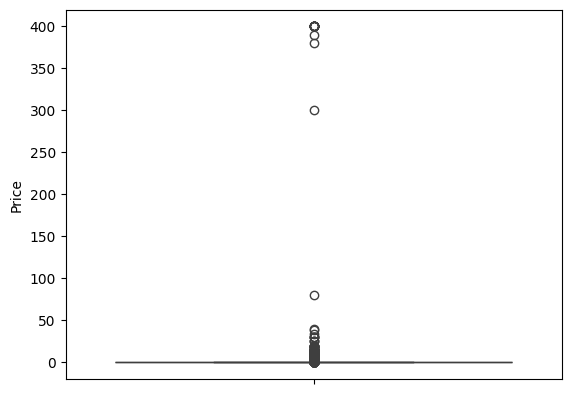

In [720]:
sns.boxplot(df_alterado['Price']);

In [721]:
df_alterado[df_alterado['Price']>=79][['App','Price','Installs','Category']]

,App,Price,Installs,Category
1912,Vargo Anesthesia Mega App,79.99,"1,000+",MEDICAL
3591,most expensive app (H),399.99,100+,FAMILY
3742,💎 I'm rich,399.99,"10,000+",LIFESTYLE
3747,I'm Rich - Trump Edition,400.00,"10,000+",LIFESTYLE
4594,I am rich,399.99,"100,000+",LIFESTYLE
4597,I am Rich Plus,399.99,"10,000+",FAMILY
4598,I am rich VIP,299.99,"10,000+",LIFESTYLE
4599,I Am Rich Premium,399.99,"50,000+",FINANCE
4600,I am extremely Rich,379.99,"1,000+",LIFESTYLE
4601,I am Rich!,399.99,"1,000+",FINANCE


Olhando para os itens que possuem preço maior que 80 dolares vemos que são muito poucos e uma rápida pesquisa sobre eles na google plays store e verificasse que são aplicativos de games e não finanças. Como são poucos e seus valores estão achatando demais o gráfico não vejo razão para não serem removidos. O aplicativo mais barato da lista é o `Vargo Anesthesia` Mega App e este de fato é o valor dele no google play store

In [722]:
indices = df_alterado[df_alterado['Price']>=80].index

In [723]:
df_sem_outliers = df_alterado.drop(indices).copy()

## Coluna Reviews
Como falado a coluna possui valores incompatíveis com o esperado e não possuem significado para análise. Por isso pode ser excluida

In [724]:
df_sem_outliers.drop(columns=['Reviews'], inplace=True)

## Coluna `Genres`

In [725]:
pd.set_option('display.max_rows', 500)
df_sem_outliers.groupby(['Category', 'Genres']).size()

Category             Genres                               
ART_AND_DESIGN       Art & Design                              55
                     Art & Design;Creativity                    5
                     Art & Design;Pretend Play                  1
AUTO_AND_VEHICLES    Auto & Vehicles                           73
BEAUTY               Beauty                                    42
BOOKS_AND_REFERENCE  Books & Reference                        177
BUSINESS             Business                                 270
COMICS               Comics                                    57
                     Comics;Creativity                          1
COMMUNICATION        Communication                            307
DATING               Dating                                   159
EDUCATION            Education                                106
                     Education;Action & Adventure               1
                     Education;Brain Games                      3
                 

De maneira geral os valores presentes na coluna `Genres` são uma expansão da coluna `Category`. Fornecendo mais detalhes sobre aquele valor. Com exceção do valor 'Family' da coluna `Category`. Ela engloba aplicativos que pela coluna `Genres` poderia pertecenter a categoria de educação, games ou video player. Por essa razão decidi por excluir a coluna `Category` e preservar a coluna `Genres`, mas dividindo ela em duas, semelhante ao estado que temos agora, mas com colunas que realmente descrevem a categoria e subcategoria do aplicativo. 

Primeiro vamos substituir alguns valores que podem ser entendidos como valores associados a games, sendo eles:

action, 
puzzle, 
adventure, 
casual,
arcade, 
card,
board,
entertainment,
simulation,
strategy,
role playing,
strategy

In [726]:
df_alterado_2 = df_sem_outliers.drop('Category', axis=1).copy()

In [727]:
df_alterado_2[['Genres_1','Genres_description']] = df_alterado_2['Genres'].str.split(';', n=1, expand=True)

In [728]:
df_alterado_2 = df_alterado_2.drop('Genres', axis=1)

In [729]:
df_alterado_2['Genres_description'] = df_alterado_2['Genres_description'].fillna('No description')

In [730]:
df_alterado_2['Genres_description'].unique()

array(['No description', 'Pretend Play', 'Creativity', 'Education',
       'Music & Video', 'Action & Adventure', 'Brain Games'], dtype=object)

Agora vamos verificar as categorias da nova coluna `Genres_1` porque há diferentes valores que representam a mesma coisa e que podem ser substituidos

In [731]:
df_alterado_2['Genres_1'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

Podemos notar que alguns valores dessa lista representam a mesma coisa e que podem ser substituidos para uma coisa so. Sendo eles:

* Education e Educational,
* Music & Audio e Music,
* Books & Reference Libraries & Demo,
* Communication e Social,
* Travel & Local e Maps & Navigation,
* Libraries & Demo e Books,
* Communication e Social,
* Travel & Local e Maps & Navigation

In [732]:
# Lista de categorias agrupadas para filtrar os aplicativos
category_mapping = {
    'Educational': 'Education',
    'Music & Audio': 'Music',
    'Books & Reference': 'Books',
    'Libraries & Demo': 'Books',
    'Communication': 'Social',
    'Travel & Local': 'Travel',
    'Maps & Navigation': 'Travel'
}

In [733]:
df_alterado_2['Genres_1'] = df_alterado_2['Genres_1'].replace(category_mapping)

Uma coisa que me chama atenção na coluna `Genres_1` é que não existe um valor para 'jogos', no entanto os valores abaixo poderiam ser substituidos por jogos. Gostaria de fazer essa alteração e englobar todos eles como a categoria de jogos. Para isso vou verificar fazer uma comparação com a coluna `Genres_description` para validar essa hipótese

In [734]:
valores_suspeitos = ['Arcade', 'Adventure', 'Casual', 'Card', 'Action','Strategy', 'Puzzle', 'Racing','Simulation', 'Board', 'Trivia', 'Role Playing', 'Word']

In [735]:
df_filtrado = df_alterado_2[df_alterado_2['Genres_1'].isin(valores_suspeitos)][['Genres_1', 'Genres_description']]

In [736]:
pd.set_option('display.max_rows', 500)
df_filtrado.groupby(['Genres_1', 'Genres_description']).size()

Genres_1      Genres_description
Action        Action & Adventure     15
              No description        349
Adventure     Action & Adventure     13
              Brain Games             1
              Education               2
              No description         73
Arcade        Action & Adventure     14
              No description        205
              Pretend Play            1
Board         Action & Adventure      3
              Brain Games            15
              No description         41
              Pretend Play            1
Card          Action & Adventure      2
              Brain Games             1
              No description         45
Casual        Action & Adventure     18
              Brain Games            13
              Creativity              7
              Education               3
              Music & Video           1
              No description        183
              Pretend Play           30
Puzzle        Action & Adventure      5
       

Podemos notar que a descrição dos gêneros são na maioria descrição de apps de jogos, por essa razão faz sentido unificar esses valores para jogos, mas antes disso vale a pena verificar os nomes dos app da categoria `Word` porque não há uma descrição de nenhum de seus apps.

In [737]:
df_alterado_2[df_alterado_2['Genres_1'].isin(['Word'])]['App']

1389                       Word Search
1424                        Wordscapes
1425                       Word Search
1469                        Wordscapes
1501                         Word Link
1512    Word Crossy - A crossword game
1583                       Word Search
1590                        Wordscapes
1698                       Word Search
3699       Korean Dungeon: K-Word 1000
3787          Draw N Guess Multiplayer
4073        Words With Friends Classic
4096            Draw Something Classic
4735             Guess the Class 🔥 AQW
4753    Evil Apples: A Dirty Card Game
5266                Faketalk - Chatbot
5536                         Word Hunt
5716                      B@dL!bs Lite
6535                  Puzzle for CS:GO
6905          Word Search multilingual
7181          How well do you know me?
7600                          SCRABBLE
7777                   Guess The Emoji
7976    Words With Friends – Play Free
7989                Classic Words Solo
8343                     

Podemos notar que são todos nomes de apps de jogos então sim, Word pode ser uma categoria unificada

In [738]:
df_games_apps = df_alterado_2[df_alterado_2['Genres_1'].isin(valores_suspeitos)].copy().reset_index(drop=True)

In [739]:
df_games_renomeados = df_alterado_2.copy()

In [740]:
mapeamento_genres = {
    'Arcade': 'Games', 
    'Adventure': 'Games', 
    'Casual': 'Games', 
    'Card': 'Games', 
    'Action': 'Games', 
    'Strategy': 'Games', 
    'Puzzle': 'Games', 
    'Racing': 'Games', 
    'Simulation': 'Games', 
    'Board': 'Games', 
    'Trivia': 'Games', 
    'Role Playing': 'Games',
    'Word':'Games'
}

In [741]:
df_games_renomeados['Genres_1'] = df_games_renomeados['Genres_1'].replace(mapeamento_genres)

## Falta de padronização

Vamos padronizar o tamanho dos arquivos

In [742]:
df_padronizado = df_games_renomeados.copy()

In [743]:
def convert_to_mb(size):
    """
    Converte valores de tamanho de armazenamento para megabytes (MB).

    Esta função recebe um valor de tamanho como string e o converte para megabytes (MB).
    Os tamanhos podem ser dados em megabytes (M), kilobytes (k), texto indicando variação 
    (e.g., "Varies with device"), ou o valor "1000+" que representa tamanhos maiores que 1GB.
    Valores em kilobytes são convertidos para megabytes dividindo por 1024.

    Parâmetros:
    size (str): Uma string representando o tamanho do aplicativo. 
                Exemplo: '19M', '700k', '1000+', 'Varies with device'

    Retorna:
    float: O tamanho convertido em megabytes (MB) como um número decimal.
           Retorna NaN para valores indefinidos ou desconhecidos.

    """
    if 'M' in size:
        return round(float(size.replace('M', '')),2)
    elif 'k' in size:
        return round(float(size.replace('k', '')) / 1024,2)
    else:
        return np.nan  # Para casos como "Varies with device"

# Aplicar a função de conversão à coluna 'Size'


In [744]:
df_padronizado['Size'] = df_padronizado['Size'].apply(convert_to_mb)

In [745]:
df_padronizado['Size'] = df_padronizado['Size'].fillna('Not informed')

In [746]:
df_padronizado['Size'] = df_padronizado['Size'].astype(str)

Por fim vale alterar o nome da coluna para que ela carregue a unidade de medida dos seus valores

In [748]:
df_padronizado = df_padronizado.rename(columns={'Size': 'Size_Megabytes'})

### Padronizando o dataframe com app de games
Vamos padronizar também o novo dataframe criado apenas com os apps de games

In [749]:
df_games_padronizado = df_games_apps.copy()

In [750]:
df_games_padronizado['Size'] = df_games_padronizado['Size'].apply(convert_to_mb)
df_games_padronizado['Size'] = df_games_padronizado['Size'].fillna('Not informed')
df_games_padronizado['Size'] = df_games_padronizado['Size'].astype(str)
df_games_padronizado = df_games_padronizado.rename(columns={'Size': 'Size_Megabytes'})

# Salvando os dados tratados
Agora que os dados foram tratados, basta salva-los em novos arquivos

In [757]:
df_games_padronizado.to_csv('../processed data/google_play_game_apps.csv')
df_padronizado.to_csv('../processed data/google_play_apps.csv')